In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.2

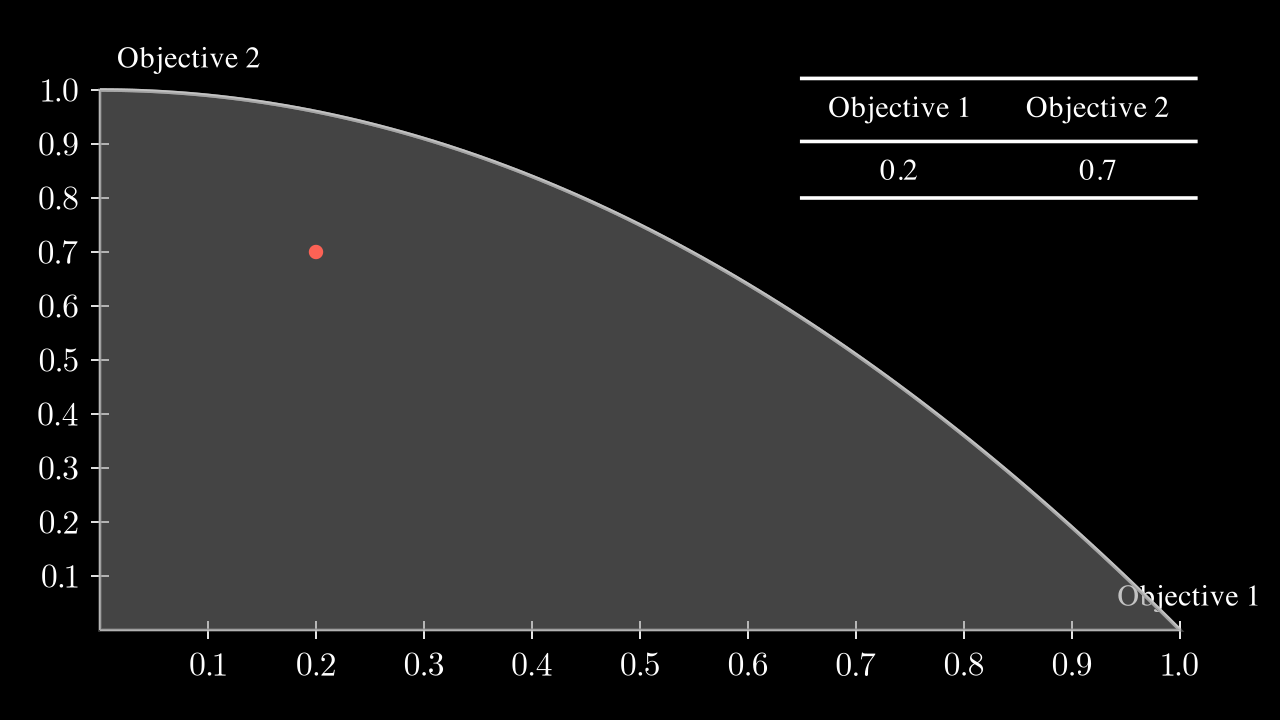

In [49]:
%%manim -qm LogScalingExample

class LogScalingExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 1, 0.1],
            y_range=[0, 1, 0.1],
            tips=False,
            axis_config={"include_numbers": True},
            # y_axis_config={"scaling": LogBase(custom_labels=True)},
        )

        labels = ax.get_axis_labels(
            Text("Objective 1").scale(0.5), Text("Objective 2").scale(0.5)
            )

        t3 = Table(
            [["0.2", "0.7"]
            ],
            # row_labels=[Text("R1"), Text("R2")],
            col_labels=[Text("Objective 1"), Text("Objective 2")],
            # top_left_entry=Star().scale(0.3),
            include_outer_lines=True,
            # line_config={"stroke_width": 1, "color": YELLOW}
            )
        t3.remove(*t3.get_vertical_lines()).scale(0.5).move_to(ax,RIGHT).align_to(ax,UP)

        pareto_front = ax.plot(lambda x: 1-x**2)
        area = ax.get_area(pareto_front, [0, 1], color=GREY, opacity=0.5)

        initial_point = [ax.coords_to_point(0.2, 0.7)]
        dot = Dot(point=initial_point, color=RED)
        # line = ax.get_line_to_point(initial_point)

        # x_min must be > 0 because log is undefined at 0.
        # graph = ax.plot(lambda x: x ** 2, x_range=[0.001, 10], use_smoothing=False)
        self.add(ax, labels, pareto_front, area, t3, dot)